<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импортируем-необходимые-библиотеки,-а-также-изучим-данные" data-toc-modified-id="Импортируем-необходимые-библиотеки,-а-также-изучим-данные-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импортируем необходимые библиотеки, а также изучим данные</a></span></li><li><span><a href="#Выполним-предобработку-данных" data-toc-modified-id="Выполним-предобработку-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Выполним предобработку данных</a></span></li><li><span><a href="#Моделирование" data-toc-modified-id="Моделирование-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Моделирование</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Начнем-с-Baseline" data-toc-modified-id="Начнем-с-Baseline-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Начнем с Baseline</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Применим-параметр-class_weight" data-toc-modified-id="Применим-параметр-class_weight-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Применим параметр class_weight</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Тюнинг" data-toc-modified-id="Тюнинг-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Тюнинг</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

### Импортируем необходимые библиотеки, а также изучим данные

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, auc, accuracy_score, roc_auc_score,f1_score,log_loss,\
classification_report, roc_curve
import numpy as np
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
display(df)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Для удобства сразу же приведем названия столбцов к привычному виду

In [4]:
df.columns = df.columns.str.lower()
df = df.rename(columns={'rownumber':'row_number', 
                        'customerid':'customer_id',  
                        'creditscore':'credit_score', 
                        'numofproducts':'num_of_products', 
                        'hascrcard':'has_crcard',
                        'isactivemember':'is_active_member', 
                        'estimatedsalary':'estimated_salary', 
                       })

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 10000 entries, 0 to 9999

Data columns (total 14 columns):

 #   Column            Non-Null Count  Dtype  

---  ------            --------------  -----  

 0   row_number        10000 non-null  int64  

 1   customer_id       10000 non-null  int64  

 2   surname           10000 non-null  object 

 3   credit_score      10000 non-null  int64  

 4   geography         10000 non-null  object 

 5   gender            10000 non-null  object 

 6   age               10000 non-null  int64  

 7   tenure            9091 non-null   float64

 8   balance           10000 non-null  float64

 9   num_of_products   10000 non-null  int64  

 10  has_crcard        10000 non-null  int64  

 11  is_active_member  10000 non-null  int64  

 12  estimated_salary  10000 non-null  float64

 13  exited            10000 non-null  int64  

dtypes: float64(3), int64(8), object(3)

memory usage: 1.1+ MB


In [6]:
print(f'Размер датасета = {df.shape}')

Размер датасета = (10000, 14)


In [7]:
df.describe()

,row_number,customer_id,credit_score,age,tenure,balance,num_of_products,has_crcard,is_active_member,estimated_salary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Рассмотрим уникальные значения в сроковых признаках, дабы избежать неявного дублирования значений

In [8]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [9]:
df.geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Далее рассмотрим как выглядит распределение наших числовых признаков

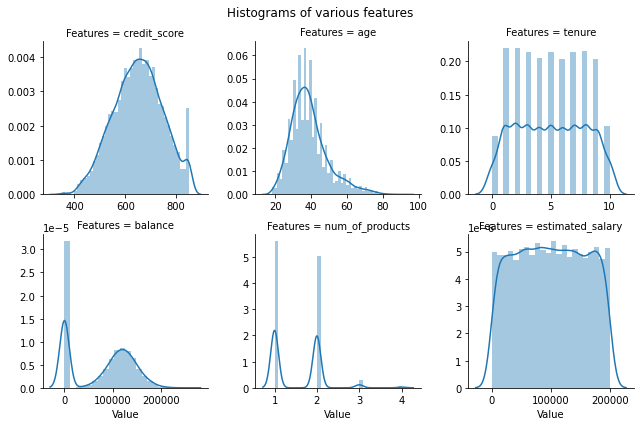

In [10]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
numeric_features = df[numeric]

numeric_features = numeric_features.stack().reset_index().rename(
    columns={"level_1": "Features", 0: "Value"})

ax = sns.FacetGrid(data=numeric_features, col="Features",
                  col_wrap=3, sharex=False, sharey=False)
ax = ax.map(sns.distplot, "Value")

plt.subplots_adjust(top=0.9)
plt.suptitle("Histograms of various features");

Рассмотрим также корреляцию

<AxesSubplot:>

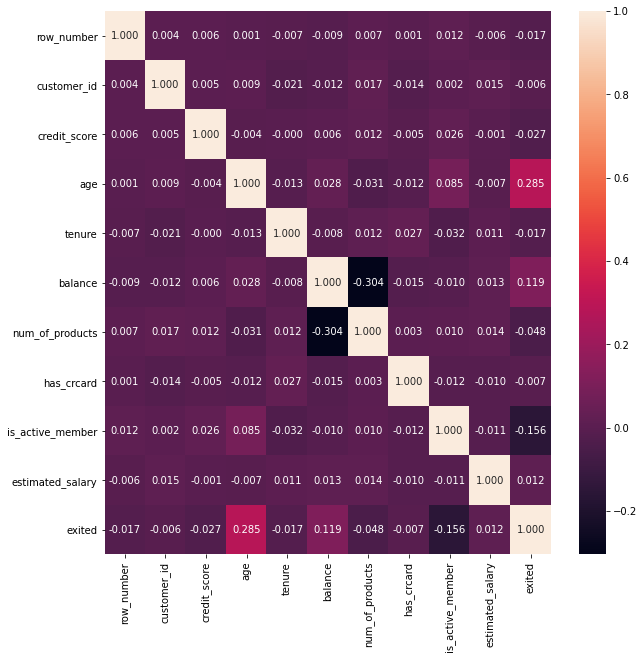

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt=".3f")

А также распределение целевой переменной

Text(0.5, 1.0, 'Распределение целевой переменной')

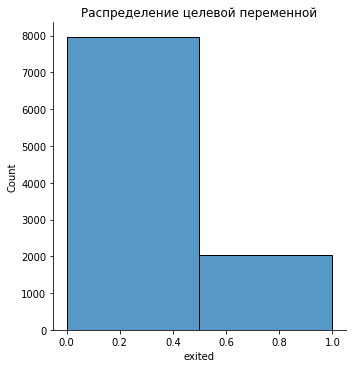

In [12]:
sns.displot(df['exited'], bins=2)
plt.title('Распределение целевой переменной')

Видим ожидаемый дисбаланс

### Выполним предобработку данных

Проверим данные на наличие дубликатов

In [13]:
df.duplicated().sum()

0

Изучим пропущенные значения

In [14]:
df.isna().sum()

row_number            0
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_crcard            0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

Для начала взглянем на таблице с пропущенными значениями в столбце tenure

In [15]:
df[df['tenure'].isna()]

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_crcard,is_active_member,estimated_salary,exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


Особой видимой зависимости обнаружить не удалось, проверим корреляцию 

<AxesSubplot:>

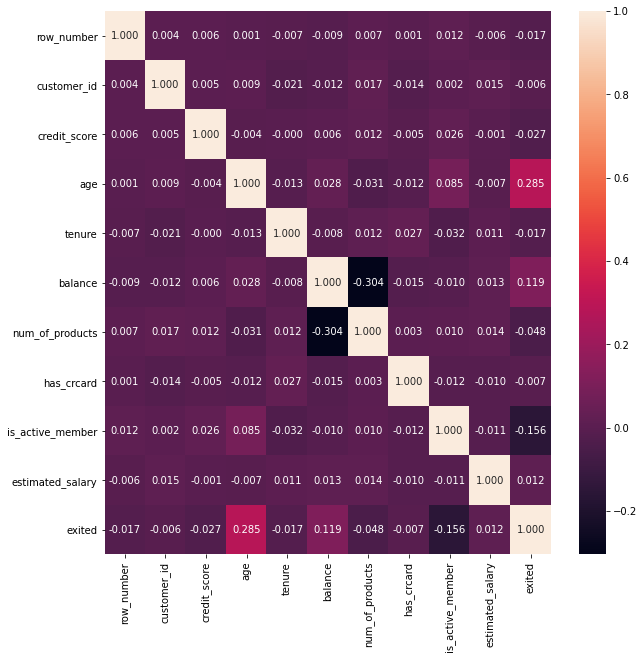

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt=".3f")

Явной линейной зависимости нет. Заменим значения на медианные

In [17]:
df = df.fillna(df['tenure'].median())
df.isna().sum()

row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_crcard          0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

Взглянем на корреляцию повторно, дабы понять сильно ли повлияла наша замена

<AxesSubplot:>

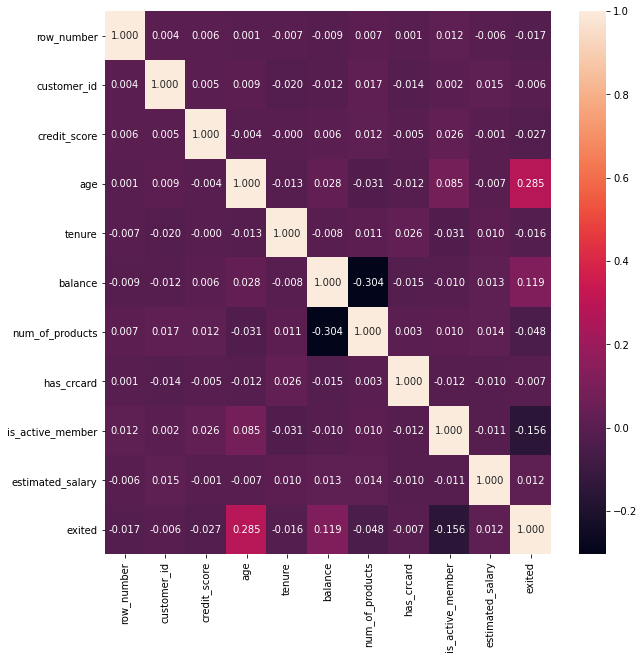

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt=".3f")

Изменения не критичные, поэтому оставим в таком виде.

### Моделирование

In [19]:
df = df.drop(['row_number', 'customer_id', 'surname'], axis=1)

Теперь применим OHE

In [20]:
df = pd.get_dummies(df, drop_first=True)

Выделим признаки и целевое значение

In [21]:
features = df.drop('exited', axis=1)
target = df['exited']

Разделим выборки на тренировочную, валидационную и тестовую

In [22]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, train_size=0.6, stratify = target, shuffle=True, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, stratify = target_valid, shuffle=True, random_state=12345)

scaler = StandardScaler()
## Выделим численные признаки
numeric = ['credit_score', 'age', 'balance', 'estimated_salary']
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)

(2000, 11)

(2000, 11)


### Вывод

Изучили данные, выполнили небольшую предобработку в tenure, а также разделили выборки и провели стандартизацию

## Исследование задачи

### Начнем с Baseline

In [23]:
def roc_auc_curve(m, y_test, y_score):
    fpr, tpr, thresholds = roc_curve(y_test, y_score)

    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.title(f'{str(m)} ROC AUC = %0.3f' % roc_auc)
    plt.legend(loc="lower right")
    plt.show()
    

model: DecisionTreeClassifier(random_state=12345)

roc-auc: 0.6907392353926495

precision: 0.49414519906323184

recall: 0.5171568627450981

f1: 0.5053892215568863

logloss: 7.132343682071518

------------------------------ 




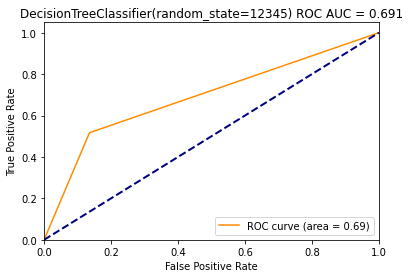

model: RandomForestClassifier(random_state=12345)

roc-auc: 0.8623401936151345

precision: 0.7675276752767528

recall: 0.5098039215686274

f1: 0.6126656848306332

logloss: 4.541874283249807

------------------------------ 




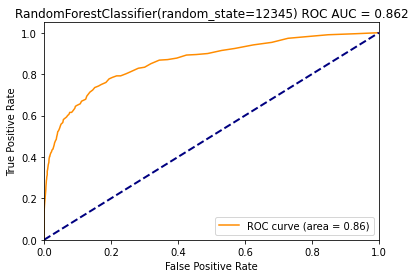

model: LogisticRegression(random_state=12345)

roc-auc: 0.7875837520938023

precision: 0.6058394160583942

recall: 0.2034313725490196

f1: 0.30458715596330277

logloss: 6.54511971596619

------------------------------ 




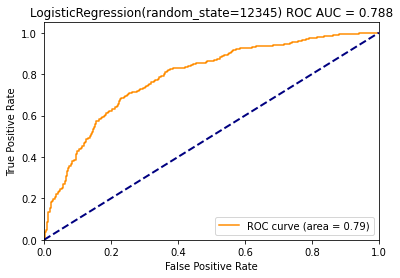

In [24]:
models = [DecisionTreeClassifier(random_state=12345), RandomForestClassifier(random_state=12345), LogisticRegression(random_state=12345)]

for m in models:
    m.fit(features_train, target_train)
    pred_valid = m.predict(features_valid)
    prob_valid = m.predict_proba(features_valid)[:,1]
    
    print(f'model: {str(m)}')
    print('roc-auc:', roc_auc_score(target_valid, prob_valid))
    print('precision:', precision_score(target_valid, pred_valid))
    print('recall:', recall_score(target_valid, pred_valid))
    print('f1:', f1_score(target_valid, pred_valid))
    print('logloss:', log_loss(target_valid, pred_valid))
    print('-'*30, '\n')
    roc_auc_curve(m, target_valid, prob_valid)

### Вывод

Не учитывая дисбаланс мы получили приемлемые параметры для модели случайного леса. f1 = 0.61

## Борьба с дисбалансом

### Применим параметр class_weight

In [25]:
models = [DecisionTreeClassifier(class_weight='balanced', random_state=12345), RandomForestClassifier(class_weight='balanced', random_state=12345), LogisticRegression(class_weight='balanced', random_state=12345)]

for m in models:
    m.fit(features_train, target_train)
    pred_valid = m.predict(features_valid)
    prob_valid = m.predict_proba(features_valid)[:,1]
    
    print(f'model: {str(m)}')
    print('roc-auc:', roc_auc_score(target_valid, prob_valid))
    print('precision:', precision_score(target_valid, pred_valid))
    print('recall:', recall_score(target_valid, pred_valid))
    print('f1:', f1_score(target_valid, pred_valid))
    print('logloss:', log_loss(target_valid, pred_valid))
    print('-'*30, '\n')

model: DecisionTreeClassifier(class_weight='balanced', random_state=12345)

roc-auc: 0.696078431372549

precision: 0.5146341463414634

recall: 0.5171568627450981

f1: 0.5158924205378974

logloss: 6.8387572861366195

------------------------------ 



model: RandomForestClassifier(class_weight='balanced', random_state=12345)

roc-auc: 0.8621123386540547

precision: 0.76

recall: 0.46568627450980393

f1: 0.5775075987841946

logloss: 4.800913906815491

------------------------------ 



model: LogisticRegression(class_weight='balanced', random_state=12345)

roc-auc: 0.7937035052714554

precision: 0.4117647058823529

recall: 0.7377450980392157

f1: 0.5285338015803336

logloss: 9.27383337548101

------------------------------ 




Значения стали даже хуже, попробуем другие методы

### Увеличение выборки

In [26]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

Попробуем увеличить в 4 раза

In [27]:
features_train_up, target_train_up = upsample(features_train, target_train, 4)

In [28]:
models = [DecisionTreeClassifier(random_state=12345), RandomForestClassifier(random_state=12345), LogisticRegression(random_state=12345)]

for m in models:
    m.fit(features_train_up, target_train_up)
    pred_valid = m.predict(features_valid)
    prob_valid = m.predict_proba(features_valid)[:,1]
    
    print(f'model: {str(m)}')
    print('roc-auc:', roc_auc_score(target_valid, prob_valid))
    print('precision:', precision_score(target_valid, pred_valid))
    print('recall:', recall_score(target_valid, pred_valid))
    print('f1:', f1_score(target_valid, pred_valid))
    print('logloss:', log_loss(target_valid, pred_valid))
    print('-'*30, '\n')

model: DecisionTreeClassifier(random_state=12345)

roc-auc: 0.701639324071337

precision: 0.5257985257985258

recall: 0.5245098039215687

f1: 0.5251533742331288

logloss: 6.68333039356723

------------------------------ 



model: RandomForestClassifier(random_state=12345)

roc-auc: 0.8667856746970145

precision: 0.6903409090909091

recall: 0.5955882352941176

f1: 0.6394736842105263

logloss: 4.731855944162709

------------------------------ 



model: LogisticRegression(random_state=12345)

roc-auc: 0.7937712459355601

precision: 0.40562248995983935

recall: 0.7426470588235294

f1: 0.5246753246753246

logloss: 9.481071631032487

------------------------------ 




RandomForest показал еще более хорошие оценки при увеличении выборки. f1=0.63

### Уменьшение выборки

In [29]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat(
    [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
    [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(
    features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

In [30]:
features_train_down, target_train_down = downsample(features_train, target_train, 0.25)

In [31]:
models = [DecisionTreeClassifier(random_state=12345), RandomForestClassifier(random_state=12345), LogisticRegression(random_state=12345)]

for m in models:
    m.fit(features_train_down, target_train_down)
    pred_valid = m.predict(features_valid)
    prob_valid = m.predict_proba(features_valid)[:,1]
    
    print(f'model: {str(m)}')
    print('roc-auc:', roc_auc_score(target_valid, prob_valid))
    print('precision:', precision_score(target_valid, pred_valid))
    print('recall:', recall_score(target_valid, pred_valid))
    print('f1:', f1_score(target_valid, pred_valid))
    print('logloss:', log_loss(target_valid, pred_valid))
    print('-'*30, '\n')

model: DecisionTreeClassifier(random_state=12345)

roc-auc: 0.7048600847374126

precision: 0.3737244897959184

recall: 0.7181372549019608

f1: 0.49161073825503354

logloss: 10.46544554882705

------------------------------ 



model: RandomForestClassifier(random_state=12345)

roc-auc: 0.8596944588136762

precision: 0.4876543209876543

recall: 0.7745098039215687

f1: 0.5984848484848485

logloss: 7.3223533288944775

------------------------------ 



model: LogisticRegression(random_state=12345)

roc-auc: 0.7926165755246822

precision: 0.40691489361702127

recall: 0.75

f1: 0.5275862068965517

logloss: 9.463803042432462

------------------------------ 




Уменьшение выборки не привело нас к желаемым улучшениям

### Вывод

Наилучшие оценки показала модель случайного леса при увеличенной выборке, будем ее использовать далее и попробуем немного потюнить фичи.

### Тюнинг

In [32]:
parameters_grid = {
    'n_estimators': [100, 200, 300 , 400, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 16, 20, None],
    'max_features': ['sqrt', 'log2']    
}

In [33]:
best_f1 = 0
best_model = None
for n_estimators in parameters_grid['n_estimators']:
    for criterion in parameters_grid['criterion']:
        for max_depth in parameters_grid['max_depth']:
            for max_features in parameters_grid['max_features']:
                model = RandomForestClassifier(n_estimators = n_estimators, criterion = criterion, max_depth = max_depth,
                                              max_features = max_features, random_state = 12345)
                model.fit(features_train_up, target_train_up)
                pred_valid = model.predict(features_valid)
                if f1_score(target_valid, pred_valid) > best_f1:
                    best_f1 = f1_score(target_valid, pred_valid)
                    best_model = model

print('Best model')                
print(best_model)

Best model

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',

                       n_estimators=400, random_state=12345)


Получили следующую модель

roc-auc: 0.8741563208197851

precision: 0.5525846702317291

recall: 0.7598039215686274

f1: 0.6398348813209493

logloss: 6.027116830389405

------------------------------ 




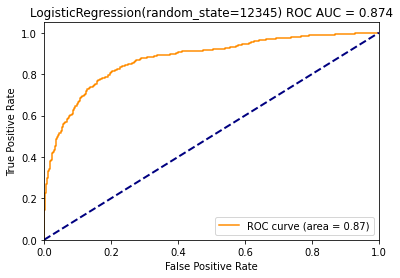

In [36]:
model = RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       n_estimators=400, random_state=12345)
model.fit(features_train_up, target_train_up)
pred_valid = model.predict(features_valid)
prob_valid = model.predict_proba(features_valid)[:,1]
print('roc-auc:', roc_auc_score(target_valid, prob_valid))
print('precision:', precision_score(target_valid, pred_valid))
print('recall:', recall_score(target_valid, pred_valid))
print('f1:', f1_score(target_valid, pred_valid))
print('logloss:', log_loss(target_valid, pred_valid))
print('-'*30, '\n')
roc_auc_curve(m, target_valid, prob_valid)

### Вывод

В данном разделе мы подобрали оптимальные параметры для модели RandomForestClassifier
roc-auc: 0.8741809537885507
precision: 0.5525846702317291
recall: 0.7598039215686274
f1: 0.6398348813209493
logloss: 6.027116830389405

## Тестирование модели

roc-auc: 0.8578192984972646

precision: 0.525089605734767

recall: 0.7199017199017199

f1: 0.6072538860103627

logloss: 6.545204073495076

------------------------------ 




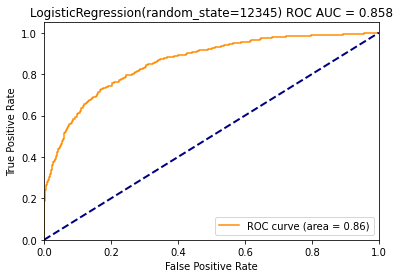

In [37]:
pred_test = model.predict(features_test)
prob_test = model.predict_proba(features_test)[:,1]
print('roc-auc:', roc_auc_score(target_test, prob_test))
print('precision:', precision_score(target_test, pred_test))
print('recall:', recall_score(target_test, pred_test))
print('f1:', f1_score(target_test, pred_test))
print('logloss:', log_loss(target_test, pred_test))
print('-'*30, '\n')
roc_auc_curve(m, target_test, prob_test)

### Вывод

Данные значения нас устраивают и более экспериментировать не требуется.

## Вывод

В данном проекте:
- Исследовали данные и выявили дисбаланс
- Провели предобработку параметров
- Исследовали базовые модели не учитывая дисбаланс классов
- Исследовали базовые модели применив методы борьбы с дисбалансом классов (class_weight, upsampling, downsampling)
- Подобрали оптимальные параметры для модели RandomForestClassifier

По итогам получили на тестовой выборке следующие оценки:
- roc-auc: 0.8578192984972646
- precision: 0.525089605734767
- recall: 0.7199017199017199
- f1: 0.6072538860103627
- logloss: 6.545204073495076